In [23]:
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from DSPTask import AddSignalSamplesAreEqual,Folding,ShiftSignalByConst,MultiplySignalByConst,SubSignalSamplesAreEqual

Signal 1 loaded.
Signal 2 loaded.
Addition Test case passed successfully
Subtraction Test case passed successfully
Addition Test case passed successfully
Folding Test case passed successfully
Multiply by 5 Test case failed, your signal have different values from the expected one
Shift by 3 Test case passed successfully
Shift by 3 Test case passed successfully
Shift by -3 Test case passed successfully
Folding Test case passed successfully
Multiply by 5 Test case passed successfully


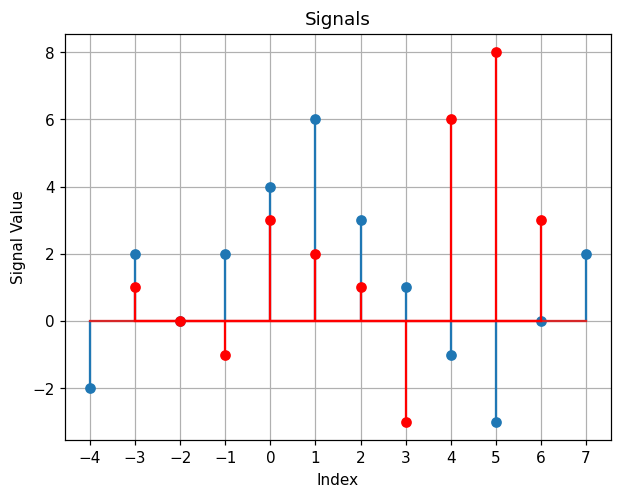

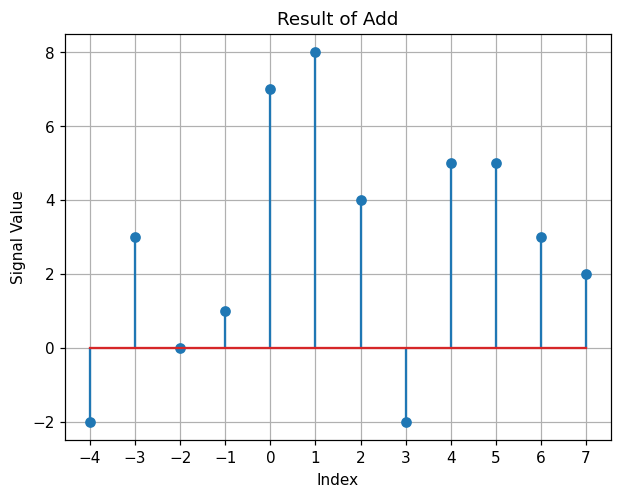

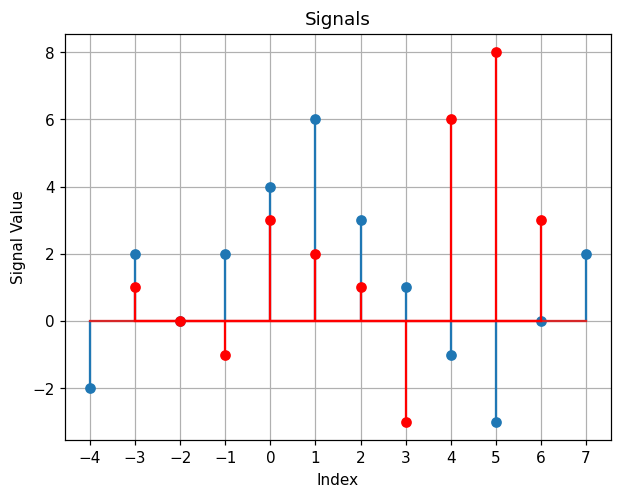

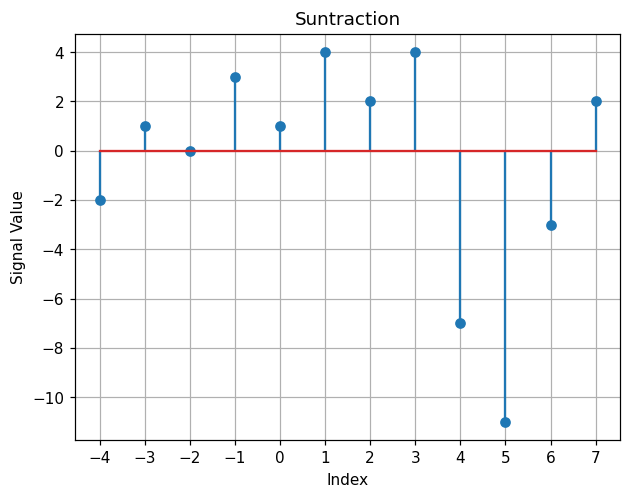

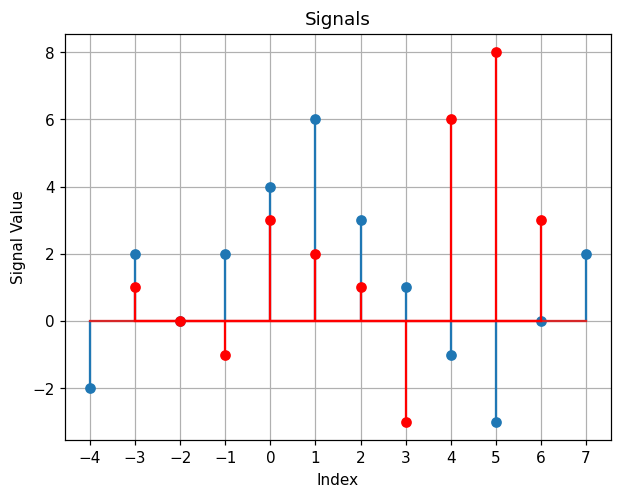

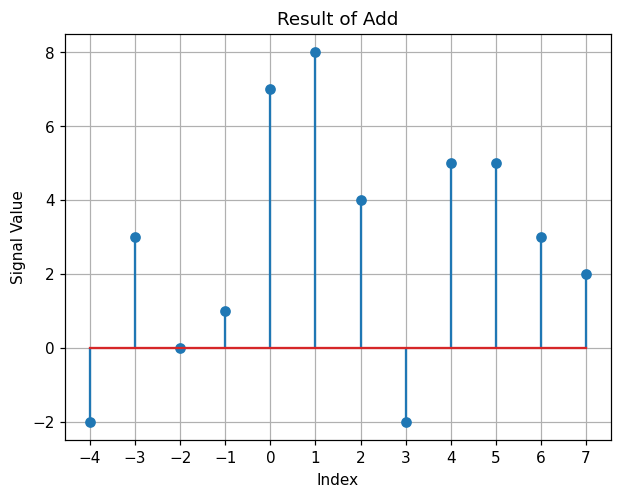

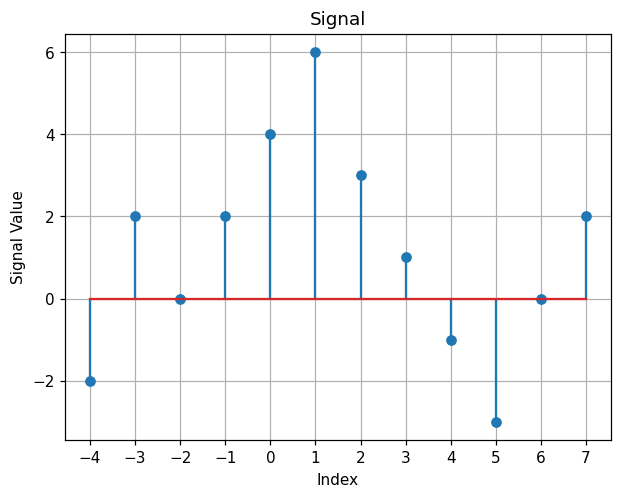

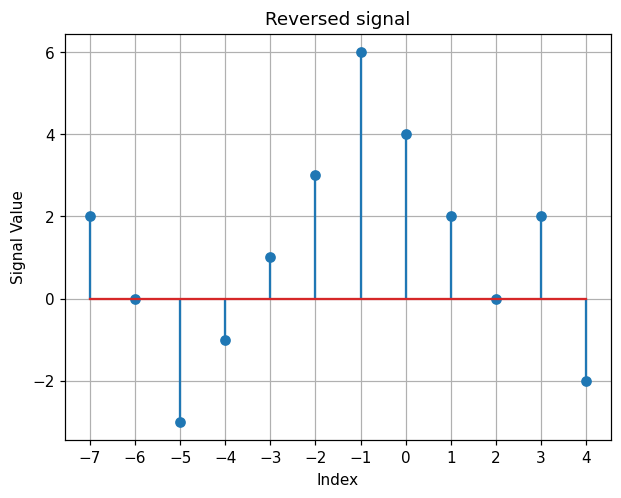

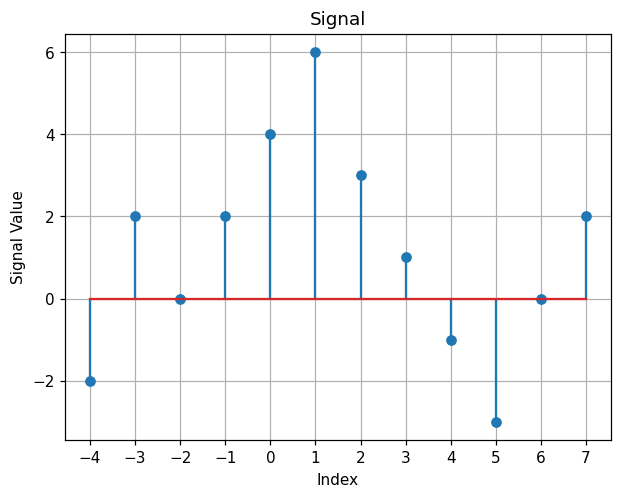

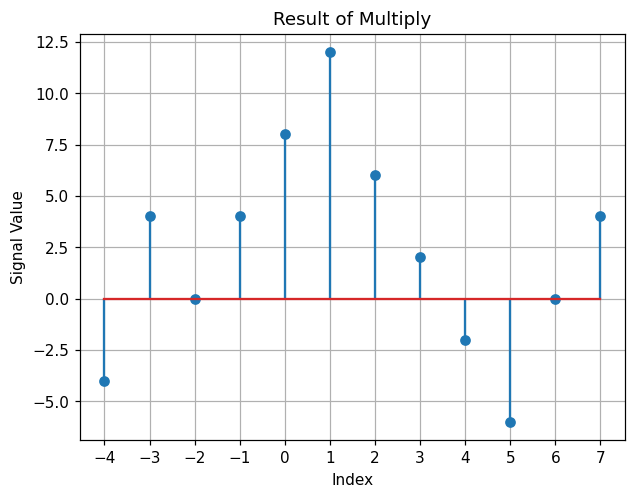

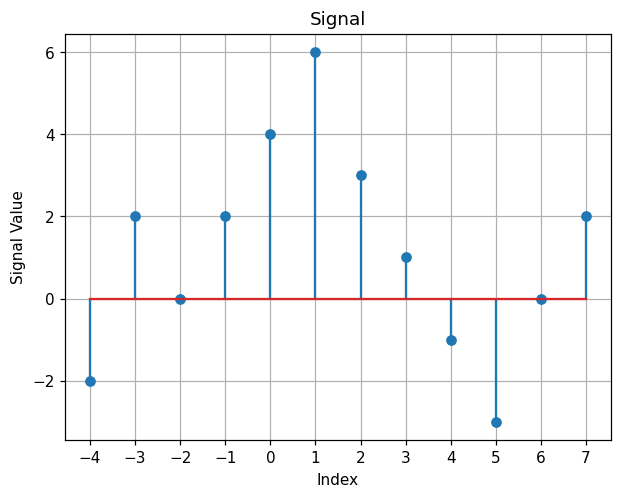

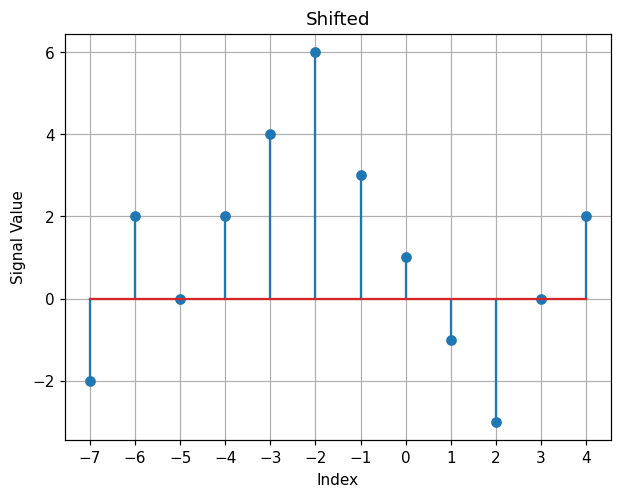

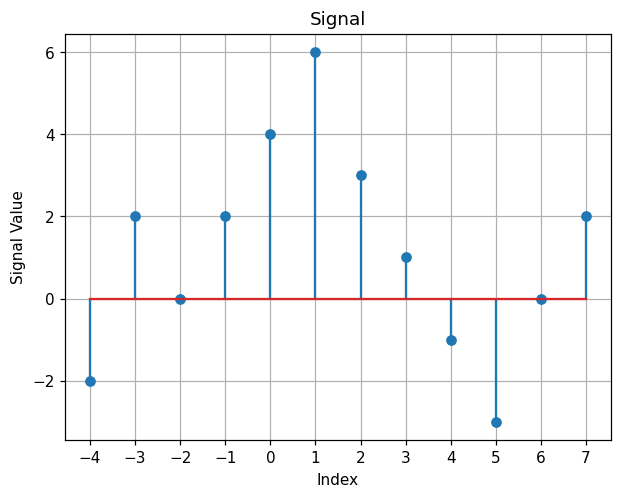

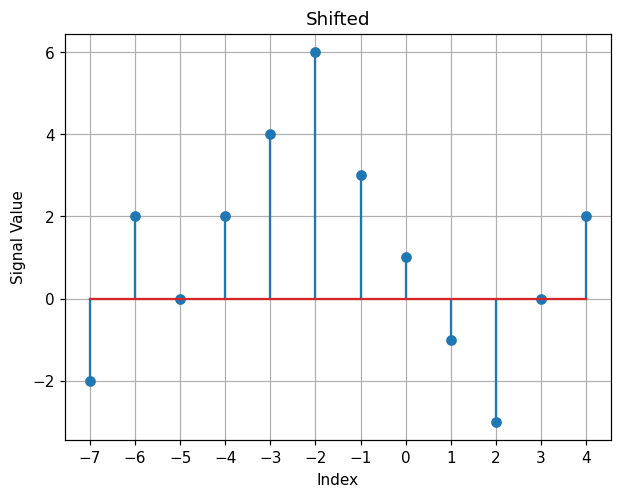

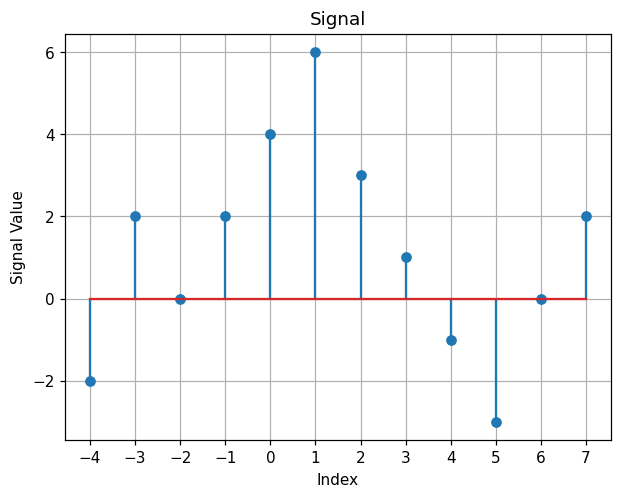

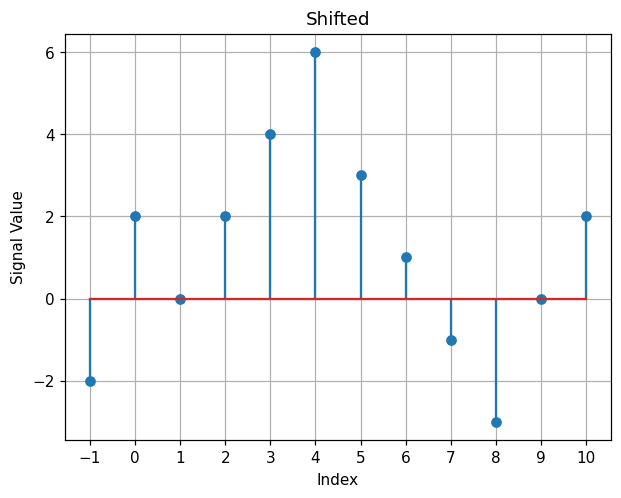

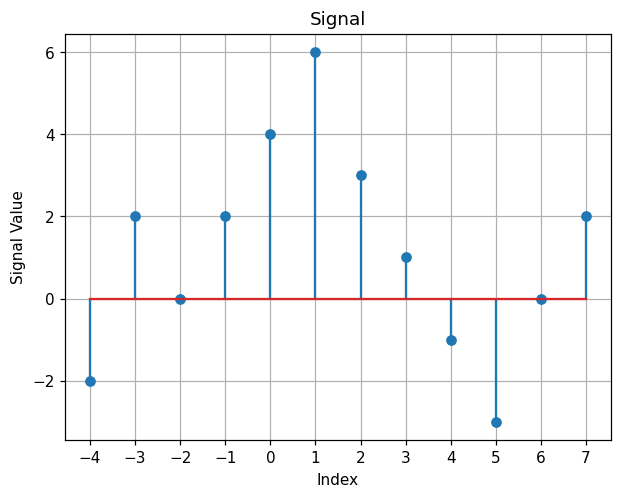

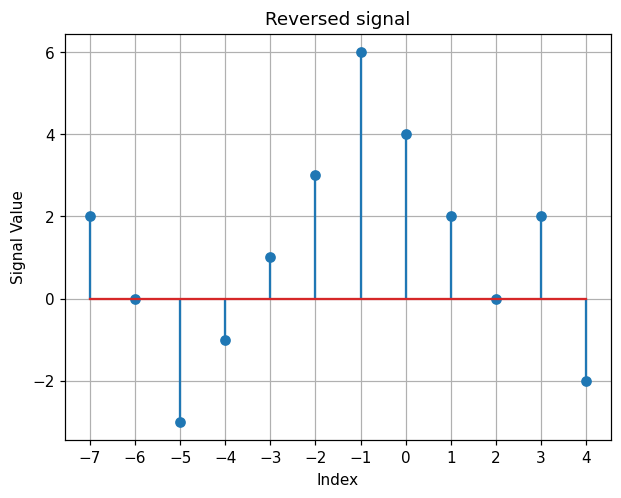

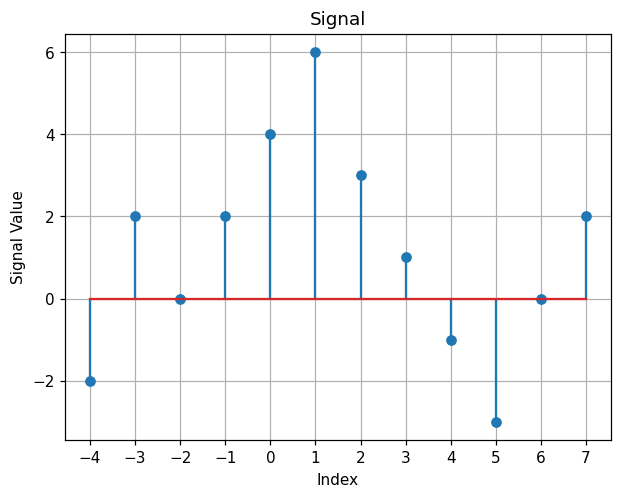

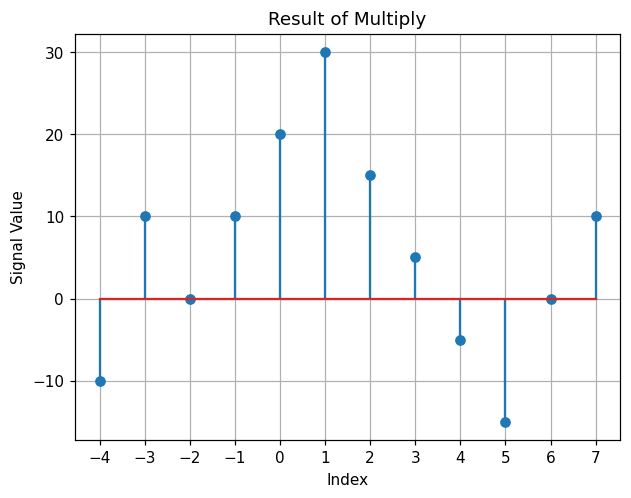

In [24]:

# Global array to hold the signals
signals = []

# Function to read the signal from the text file
def read_signal():
    file_path = filedialog.askopenfilename(filetypes=[("Text files", "*.txt")])
    if not file_path:
        return
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    N = int(lines[2].strip())  # First row: number of samples
    indices = []
    values = []
    
    for i in range(3, N + 3):
        parts = lines[i].strip().split()
        indices.append(int(parts[0]))  # Sample index
        values.append(float(parts[1]))  # Sample value

    signals.append([indices, values])
    print(f"Signal {len(signals)} loaded.")



def plot_signal(signal_index, frame, second_signal_index=None, title=""):
    # Clear the previous plots in the frame
    for widget in frame.winfo_children():
        widget.destroy()
    
    times = signals[signal_index][0]
    values = signals[signal_index][1]
    
    # Create the plot using matplotlib
    fig, ax = plt.subplots()
    ax.stem(times, values, label=f'Signal {signal_index + 1}')
    
    if second_signal_index is not None:
        times_2 = signals[second_signal_index][0]
        values_2 = signals[second_signal_index][1]
        ax.stem(times_2, values_2, linefmt='r-', markerfmt='ro', basefmt='r-', label=f'Signal {second_signal_index}')
    
    ax.set_xlabel('Index')
    ax.set_ylabel('Signal Value')
    ax.set_title(title)
    ax.grid(True)
    
    # Set x-axis ticks to integer values
    ax.set_xticks(range(min(times), max(times) + 1))
    
    # if second_signal_index is not None:
    #     ax.legend()

    # Embed the plot into the Tkinter frame
    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.draw()

    # Add the canvas to the frame
    canvas.get_tk_widget().pack()


# Function to add two signals
def add_signals(signal1_index, signal2_index,frame_before,frame_after):
    indices1, values1 = signals[signal1_index]
    indices2, values2 = signals[signal2_index]
    plot_signal(signal1_index,frame_before,signal2_index,"Signals")

    combined_indices = sorted(set(indices1 + indices2))
    combined_values = []

    for idx in combined_indices:
        val1 = values1[indices1.index(idx)] if idx in indices1 else 0
        val2 = values2[indices2.index(idx)] if idx in indices2 else 0
        combined_values.append(val1 + val2)
    
    signals.append([combined_indices, combined_values])
    plot_signal(len(signals) - 1,frame_after,title="Result of Add")

    AddSignalSamplesAreEqual("Signal1.txt", "Signal2.txt",combined_indices,combined_values)

# Function to multiply a signal by a constant
def multiply_signal(signal_index, constant,frame_before,frame_after):
    indices, values = signals[signal_index]
    plot_signal(signal_index,frame_before,title="Signal")
    new_values = [val * constant for val in values]
    signals.append([indices, new_values])
    #if view:
    #plot_signal(len(signals) - 1, frame)
    plot_signal(len(signals) - 1, frame_after,title="Result of Multiply")
    MultiplySignalByConst(5,indices, new_values)


# Function to subtract two signals
def subtract_signals(signal1_index, signal2_index,frame_before,frame_after):
    plot_signal(signal1_index,frame_before,signal2_index,"Signals")
    indices, values = signals[signal2_index]
    new_values = [val * -1 for val in values]
    signals.append([indices, new_values])
    
    #multiply_signal(signal2_index, -1,0)
    indices1, values1 = signals[signal1_index]
    indices2, values2 = signals[len(signals)-1]



    combined_indices = sorted(set(indices1 + indices2))
    combined_values = []

    for idx in combined_indices:
        val1 = values1[indices1.index(idx)] if idx in indices1 else 0
        val2 = values2[indices2.index(idx)] if idx in indices2 else 0
        combined_values.append(val1 + val2)
    
    signals.append([combined_indices, combined_values])
    
    #add_signals(signal1_index, len(signals) - 1)

    #plot_signal(len(signals) - 1, frame)
    plot_signal(len(signals) - 1, frame_after, title="Suntraction")
    SubSignalSamplesAreEqual("Signal1.txt", "Signal2.txt",combined_indices,combined_values)



# Function to shift a signal by k steps
def shift_signal(signal_index, k,frame_before,frame_after):
    indices, values = signals[signal_index]
    plot_signal(signal_index,frame_before,title="Signal")
    tempk = k*-1
    new_indices = [idx + tempk for idx in indices]
    signals.append([new_indices, values])
    #plot_signal(len(signals) - 1,frame)
    plot_signal(len(signals) - 1,frame_after,title="Shifted")
    ShiftSignalByConst(k,new_indices,values)


def fold_signal(signal_index,frame_before,frame_after,):
    indices, values = signals[signal_index]
    plot_signal(signal_index,frame_before,title="Signal")
    
    # Reverse indices by negating and creating a list of (negated index, value) pairs
    pairs = [(-idx, val) for idx, val in zip(indices, values)]
    
    # Sort based on the negated indices (first element of each pair)
    pairs.sort(key=lambda pair: pair[0])
    
    # Separate the sorted pairs into indices and values
    new_indices, new_values = zip(*pairs)  # This unzips the pairs into two lists
    
    # Append the reversed signal to the list of signals
    signals.append([list(new_indices), list(new_values)])
    
    # Call the plot function to visualize the result
    #plot_signal(len(signals) - 1,frame)
    plot_signal(len(signals) - 1,frame_after,title="Reversed signal")
    Folding(new_indices, new_values)


# Function to save the last generated signal to a text file
def save_signal():
    if not signals:
        print("No signal to save!")
        return
    
    file_path = filedialog.asksaveasfilename(defaultextension=".txt", filetypes=[("Text files", "*.txt")])
    if not file_path:
        return

    indices, values = signals[-1]
    with open(file_path, 'w') as file:
        file.write(f"{len(indices)}\n")
        for idx, val in zip(indices, values):
            file.write(f"{idx} {val}\n")
    print(f"Signal saved to {file_path}")

# Creating the main Tkinter window
root = tk.Tk()
root.title("Signal Reader")

# Set the window size to fill the screen (without hiding the title bar)
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
root.geometry(f"{int(screen_width)}x{screen_height}")


# Configure grid weights for resizing
root.columnconfigure(0, weight=1)
root.columnconfigure(1, weight=1)


# Frame for signals before the operation (top left)
frame_before = tk.Frame(root)
frame_before.grid(row=0, column=0, padx=10, pady=10, sticky="nsew")

# Frame for signals after the operation (top right)
frame_after = tk.Frame(root)
frame_after.grid(row=0, column=1, padx=10, pady=10, sticky="nsew")


# Set the row height to ensure frames are of equal height
root.rowconfigure(0, weight=1)


# Move input fields and buttons to the bottom of the screen
control_frame = tk.Frame(root)
control_frame.grid(row=5, column=0, columnspan=4, pady=20)

# Entry fields for signal index and operation value
signal_number_label = tk.Label(control_frame, text="Signal One Number:")
signal_number_label.grid(row=0, column=0, padx=5, pady=5)
signal_number_entry = tk.Entry(control_frame)
signal_number_entry.grid(row=0, column=1, padx=5, pady=5)

operation_value_label = tk.Label(control_frame, text="Operation Value/Signal Two Number:")
operation_value_label.grid(row=0, column=2, padx=5, pady=5)
operation_value_entry = tk.Entry(control_frame)
operation_value_entry.grid(row=0, column=3, padx=5, pady=5)

# Buttons for signal operations
button_read = tk.Button(control_frame, text="Read Signal", command=read_signal)
button_read.grid(row=1, column=0, padx=5, pady=10)

button_display = tk.Button(control_frame, text="View Signal", command=lambda: plot_signal(int(signal_number_entry.get()) - 1, frame_before))
button_display.grid(row=1, column=1, padx=5, pady=10)

button_add = tk.Button(control_frame, text="Add Signals", command=lambda: add_signals(int(signal_number_entry.get()) - 1, int(operation_value_entry.get()) - 1, frame_before,frame_after))
button_add.grid(row=2, column=0, padx=5, pady=10)

button_multiply = tk.Button(control_frame, text="Multiply Signal", command=lambda: multiply_signal(int(signal_number_entry.get()) - 1, float(operation_value_entry.get()), frame_before,frame_after))
button_multiply.grid(row=2, column=1, padx=5, pady=10)

button_subtract = tk.Button(control_frame, text="Subtract Signals", command=lambda: subtract_signals(int(signal_number_entry.get()) - 1, int(operation_value_entry.get()) - 1, frame_before,frame_after))
button_subtract.grid(row=3, column=0, padx=5, pady=10)

button_shift = tk.Button(control_frame, text="Shift Signal", command=lambda: shift_signal(int(signal_number_entry.get()) - 1, int(operation_value_entry.get()), frame_before,frame_after))
button_shift.grid(row=3, column=1, padx=5, pady=10)

button_fold = tk.Button(control_frame, text="Fold Signal", command=lambda: fold_signal(int(signal_number_entry.get()) - 1, frame_before,frame_after))
button_fold.grid(row=4, column=0, padx=5, pady=10)

# Button to save the output signal
button_save = tk.Button(control_frame, text="Save Signal", command=save_signal)
button_save.grid(row=4, column=1, padx=5, pady=10)

# Start the Tkinter event loop
root.mainloop()
